In [6]:
# import matplotlib.pyplot as plt

# import pandas as pd
# import numpy as np
# import os

# from photutils.aperture import aperture_photometry, CircularAperture
# from vip_hci.preproc.recentering import frame_shift, frame_center, cube_recenter_2dfit
# from vip_hci.preproc.derotation import cube_derotate
# from vip_hci.psfsub import pca, pca_annular
# from vip_hci.metrics import contrast_curve
# from vip_hci.var import fit_2dgaussian
# from vip_hci.fm import normalize_psf
# from astropy.io import fits

# from core.engine import get_angle_radius, preprocess

In [3]:
data_path = './data/f_dhtau/'

cube   = fits.getdata(os.path.join(data_path, 'center_im.fits'), ext=0)
psfs   = fits.getdata(os.path.join(data_path, 'median_unsat.fits'), ext=0)
angles = fits.getdata(os.path.join(data_path, 'rotnth.fits'), ext=0)
angles = -angles

We first need to estimate the flux of the star. We load the PSF

In [4]:
single_psf = psfs[0, 0]

now we fit a 2d-gaussian model to the PSF  

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-08-01 19:27:04
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
`subi_size` is odd (while frame size is even)
Setting `subi_size` to 8 pixels
2d gauss-fitting
frames
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Shifting
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
Running time:  0:00:00.102832
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
`Force_odd` is True and frame size is even, therefore new frame size was set to 63


(64, 64)

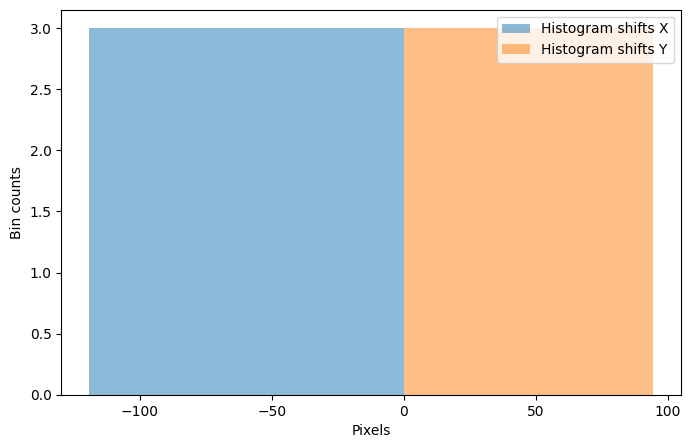

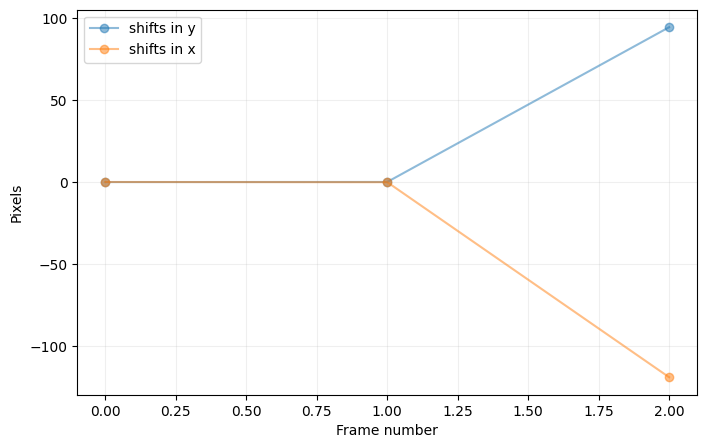

In [5]:
fit = fit_2dgaussian(single_psf, 
                     crop=True, 
                     cropsize=30, 
                     debug=False, 
                     full_output=True)  
mean_fwhm_fit = np.mean([fit.fwhm_y, fit.fwhm_x])

y_cent, x_cent = frame_center(single_psf) 
y_c=int(y_cent)
x_c=int(x_cent)
psf_center, y0_sh, x0_sh = cube_recenter_2dfit(psfs[0], 
                                               (y_c, x_c), 
                                               mean_fwhm_fit,
                                               model='gauss',
                                               nproc=1, 
                                               subi_size=7, 
                                               negative=False,
                                               full_output=False, 
                                               debug=False) 

psf_norm, fwhm_flux,fwhm = normalize_psf(psf_center, 
                                         fwhm=mean_fwhm_fit, 
                                         full_output=True, 
                                         verbose=False)
psf_center.shape

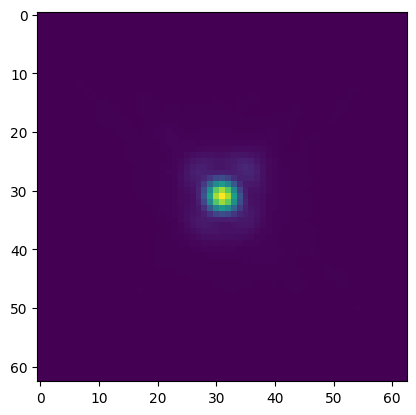

In [42]:
plt.imshow(psf_norm)

In [62]:
aper = CircularAperture((single_npsf[0].shape[0]//2, single_npsf[0].shape[0]//2), 
                        r=mean_fwhm_fit/2.) 
starphot_estimated = aperture_photometry(single_npsf, aper, method='exact')
starphot_estimated = starphot_estimated['aperture_sum'][0]

In [ ]:
cc_1 = contrast_curve(cube, 
                      rot_angles, 
                      psf_norm, 
                      fwhm=row['fwhm_mean'], 
                      pxscale=0.01225, 
                      starphot=starphot_estimated,
                      sigma=5, 
                      nbranch=1, 
                      algo=pca_annular,
                      radius_int=int(row['fwhm_mean']),
                      ncomp=9, 
                      debug=True)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Starting time: 2023-08-01 16:27:26
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
ALGO : pca_annular, FWHM = 4.261339461993815, # BRANCHES = 1, SIGMA = 5, STARPHOT = 0.9999999207732931
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
